In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for null spaces
import scipy.linalg

# a pretty-looking matrix from scipy
from scipy.linalg import toeplitz


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

[ 0.          1.28205128  2.56410256  3.84615385  5.12820513  6.41025641
  7.69230769  8.97435897 10.25641026 11.53846154 12.82051282 14.1025641
 15.38461538 16.66666667 17.94871795 19.23076923 20.51282051 21.79487179
 23.07692308 24.35897436 25.64102564 26.92307692 28.20512821 29.48717949
 30.76923077 32.05128205 33.33333333 34.61538462 35.8974359  37.17948718
 38.46153846 39.74358974 41.02564103 42.30769231 43.58974359 44.87179487
 46.15384615 47.43589744 48.71794872 50.        ]


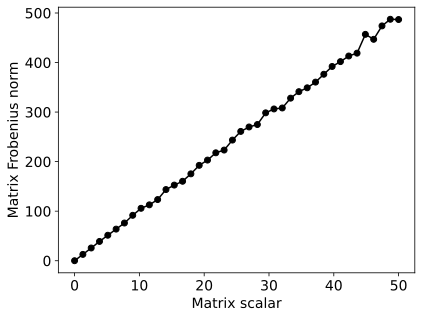

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
#5-1
# experiment simulations
scalingVals = np.linspace(0,50,40) # range of scaling parameters (0 to 50 in 40 steps)
nExperiments = 10

# initialize output
matrixNorms = np.zeros((len(scalingVals),nExperiments))

# run experiment!
for si in range(len(scalingVals)):
  for expi in range(nExperiments):

    # generate a random scaled matrix
    R = np.random.randn(10,10) * scalingVals[si]

    # store its norm
    matrixNorms[si,expi] = np.linalg.norm(R,'fro')


# plot the results!
plt.plot(scalingVals,np.mean(matrixNorms,axis=1),'ko-')
plt.xlabel('Matrix scalar')
plt.ylabel('Matrix Frobenius norm')
plt.savefig('Figure_05_07.png',dpi=300)
plt.show()

# check that norm=0 for zeros matrix
print(matrixNorms[0,:])




In [20]:
#5-2
# Function to compute Euclidean distance

def EuclideanDistance(M1,M2):
    D = M1-M2
    return np.sqrt(np.sum(D**2))


N = 7
A = np.random.randn(N,N)
B = np.random.randn(N,N)

# optimization
numIters = 0
s = 1
while EuclideanDistance(s*A,s*B)>1:
    s *= .9
    numIters += 1

print(f'Number of iterations: {numIters-1}')
print(f'Final value of scalar: {s/.9:.3f}')
print(f'Final Euclidean distance: {EuclideanDistance(s/.9*A,s/.9*B):.3f}')


Number of iterations: 22
Final value of scalar: 0.098
Final Euclidean distance: 1.006


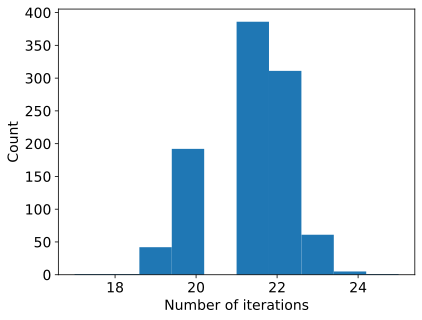

In [21]:
#5-2
nIters = np.zeros(1000)

for i in range(1000):
    # create two matrices
    A = np.random.randn(N,N)
    B = np.random.randn(N,N)

    numIters,s = 0,1
    while EuclideanDistance(s*A,s*B)>1:
        s *= .9
        numIters += 1
    nIters[i] = numIters-1

plt.hist(nIters)
plt.xlabel('Number of iterations')
plt.ylabel('Count');


In [22]:
#5-3

# Create a matrix
M = 50
A = np.random.randn(M,M)

# trace method
norm1 = np.sqrt(np.sum(np.diag(A.T@A)))

# Euclidean norm method
norm2 = np.sqrt(np.sum(A**2))

# if they're equal, their difference should be (very close to) zero
norm1-norm2

0.0

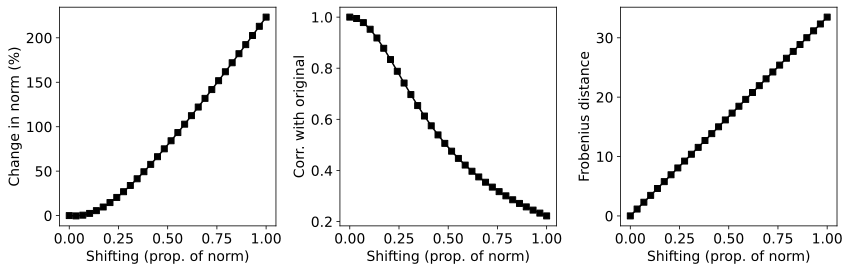

In [24]:
#5-4
# size of the matrix
N = 10

shifting = np.linspace(0,1,30)

# original matrix
A = np.random.randn(N,N)
normA = np.linalg.norm(A,'fro')

# initialize results matrices
shiftingResults = np.zeros( (len(shifting),3) )
resultsNames = [ 'Change in norm (%)','Corr. with original','Frobenius distance' ]



for si in range(len(shifting)):

  # shift the matrix
  As = A + shifting[si]*normA*np.eye(N)

  # get the new norm and transform to %-change
  normShift = np.linalg.norm(As,'fro')
  shiftingResults[si,0] = 100 * (normShift-normA)/normA

  # compute correlation
  shiftingResults[si,1] = np.corrcoef(A.flatten(),As.flatten())[0,1]

  # Frobenius distance
  shiftingResults[si,2] = EuclideanDistance(A,As)




## plotting!
_,axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):

  # plot the results
  axs[i].plot(shifting,shiftingResults[:,i],'ks-')
  axs[i].set_xlabel('Shifting (prop. of norm)')
  axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.savefig('Figure_05_06.png',dpi=300)
plt.show()


In [34]:
#5-5

# Make a matrix with specified size and rank

M = 5
N = 8
r = 3

A = np.random.randn(M,r) @ np.random.randn(r,N)

print(A.shape)
print(np.linalg.matrix_rank(A))

(5, 8)
3


In [38]:
#5-6
# summed matrix has rank-0

A = np.diag([ 1,0,0,0,0])
B = np.diag([-1,0,0,0,0])
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)


# summed matrix has rank-1

A = np.diag([1,0,0,0,0])
B = np.zeros(A.shape)
B[0,1] = 10
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)



# summed matrix has rank-2

A = np.diag([1,0,0,0,0])
B = np.diag([0,1,0,0,0])
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)


# random matrices have maximum possible rank!
A = np.random.randn(5,1) @ np.random.randn(1,5)
B = np.random.randn(5,1) @ np.random.randn(1,5)
C = A+B

# print out their ranks
np.linalg.matrix_rank(A),np.linalg.matrix_rank(B),np.linalg.matrix_rank(C)

(1, 1, 2)

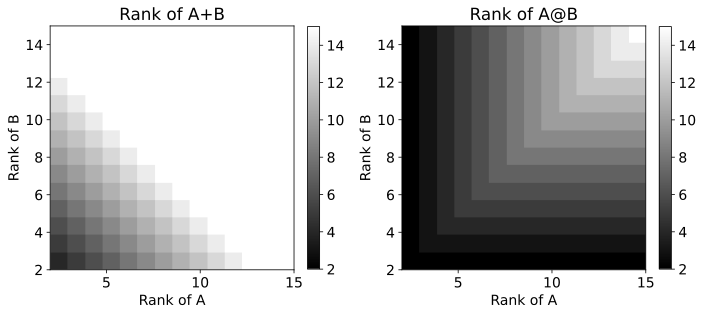

In [39]:
#5-7
# The function
def makeAmatrix(M,r):
  return np.random.randn(M,r) @ np.random.randn(r,M)


# parameters
matSize = 20 # matrix size (square)
rs = range(2,16) # range of ranks

# initialize results matrix
Ranks = np.zeros((len(rs),len(rs),2))

# run the simulation
for i in range(len(rs)):
  for j in range(len(rs)):

    # create the matrices
    S = makeAmatrix(matSize,rs[i]) + makeAmatrix(matSize,rs[j])
    M = makeAmatrix(matSize,rs[i]) @ makeAmatrix(matSize,rs[j])
    
    # compute their ranks
    Ranks[i,j,0] = np.linalg.matrix_rank(S)
    Ranks[i,j,1] = np.linalg.matrix_rank(M)



## visualization
fig,axs = plt.subplots(1,2,figsize=(10,6))
s = '+@' # symbols for title

for i in range(2):

  # draw heatmat
  h = axs[i].imshow(Ranks[:,:,i],vmin=np.min(rs),vmax=np.max(rs),origin='lower',
                    extent=(rs[0],rs[-1],rs[0],rs[-1]),cmap='gray')
  
  # add colorbar and other niceties
  fig.colorbar(h,ax=axs[i],fraction=.045)
  axs[i].set_xlabel('Rank of A')
  axs[i].set_ylabel('Rank of B')
  axs[i].set_title(f'Rank of A{s[i]}B')


plt.savefig('Figure_05_09.png',dpi=300)
plt.tight_layout()
plt.show()


In [40]:
#5-8

# matrix sizes and rank
M = 15
N = 8
r = 4

# compute the four matrices
A   = np.random.randn(M,r) @ np.random.randn(r,N)
At  = A.T
AtA = A.T@A
AAt = A@A.T

# print their ranks
print(
    np.linalg.matrix_rank(A),
    np.linalg.matrix_rank(At),
    np.linalg.matrix_rank(AtA),
    np.linalg.matrix_rank(AAt)
)

4 4 4 4


In [42]:
#5-9

# function to run algorithm
def is_V_inColA(A,v):

  # check sizes
  if A.shape[0]!=v.shape[0]:
    raise Exception('Size mismatch! A and v must have the same column dimensionality!.')

  # compute ranks
  rankA  = np.linalg.matrix_rank(A)
  rankAv = np.linalg.matrix_rank( np.hstack((A,v)) )

  # function outputs TRUE if v \in C(A)
  return rankA==rankAv


# create matrix and vector
A = np.random.randn(4,3)
v = np.random.randn(4,1)

# test!
is_V_inColA(A,v)


False

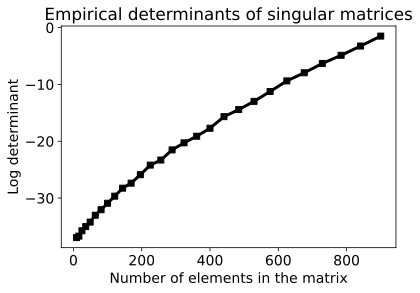

In [43]:
#5-10
# matrix sizes
ns = np.arange(3,31)

# iteration
iters = 100

# initialize
dets = np.zeros((len(ns),iters))

# loop over matrix sizes
for ni in range(len(ns)):
  for i in range(iters):
      
    # step 1
    A = np.random.randn(ns[ni],ns[ni])
    
    # step 2
    A[:,0] = A[:,1]
    
    # step 3
    dets[ni,i]=np.abs(np.linalg.det(A))
        

# note: the number of elements in a square matrix is the columns squared


# plotting
plt.figure(figsize=(6,4))
plt.plot(ns**2,np.log(np.mean(dets,axis=1)),'ks-',linewidth=3)
plt.xlabel('Number of elements in the matrix')
plt.ylabel('Log determinant')
plt.title('Empirical determinants of singular matrices')
plt.savefig('Figure_05_10.png',dpi=300)
plt.show()

